## Introduction

Key concepts to understand in LangGraph:

1. **Node** - Python functions that perform tasks and operate on the state
2. **Edge** - Connections between nodes that define the flow of execution
3. **State** - A schema that serves as the input for nodes and edges
4. **StateGraph** - The structure that defines the entire graph workflow

## State
- The State schema serves as the input schema for all Nodes and Edges in the graph.

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

Here we use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

## Nodes

- Nodes are Python functions that perform operations on the state.
- The first positional argument is the state (a `TypedDict` with the schema defined above).
- Each node can access the state key via `state['graph_info']`.
- Each node returns a dictionary with updated state values.
- By default, the returned values will override the prior state values.

In [4]:
def watch_movie(state: State) -> str:
    print("---watch node is called---")
    return {"graph_info": state["graph_info"] + "I'm planning to watch a movie tonight."}

def superman_movie(state: State) -> str:
    print("---superman node is called---")
    return {"graph_info": state["graph_info"] + "I wanted to watch the new superman movie."}

def ironman_movie(state: State) -> str:
    print("---ironman node is called---")
    return {"graph_info": state["graph_info"] + "I wanted to watch the new ironman movie."}

**Explanation:**

These three functions define **nodes** for a LangGraph workflow:

1. **`watch_movie`** - Appends "I'm planning to watch a movie tonight." to `graph_info`
2. **`superman_movie`** - Appends "I wanted to watch the new superman movie." to `graph_info`
3. **`ironman_movie`** - Appends "I wanted to watch the new ironman movie." to `graph_info`

**Key concepts:**

- Each function receives the **state** as input (a `TypedDict` with a `graph_info` key)
- Each function returns a **dictionary** with the updated `graph_info` value

These nodes represent different "choices" in a graph - decision points where the workflow could branch to different paths.

In [5]:
import random
from typing import Literal

def random_movie(state: State) -> Literal["superman", "ironman"]:
    movies = ["superman", "ironman"]
    return random.choice(movies)

## Graph Construction

Now we build the graph using the components defined above.

**Steps to build a StateGraph:**

1. **Initialize** - Create a `StateGraph` with the `State` class as the schema
2. **Add Nodes** - Register each node function with a unique name
3. **Add Edges** - Define connections between nodes to control the flow
4. **Add Entry Point** - Use `START` to indicate where the graph begins
5. **Add Exit Point** - Use `END` to mark the terminal node
6. **Compile** - Finalize the graph and perform validation checks

**Special Nodes:**
- `START` - Entry point that receives user input and passes it to the graph
- `END` - Terminal node that marks the end of execution

Once compiled, the graph can be visualized as a Mermaid diagram.

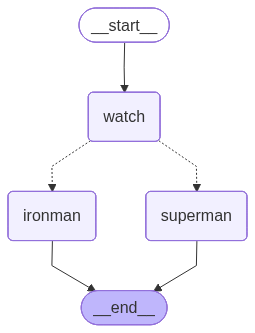

In [6]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

# Add nodes
graph.add_node("watch",watch_movie)
graph.add_node("superman",superman_movie)
graph.add_node("ironman",ironman_movie)

# Design the flow
graph.add_edge(START,"watch")
graph.add_conditional_edges("watch",random_movie,{"superman":"superman","ironman":"ironman"})
graph.add_edge("superman",END)
graph.add_edge("ironman",END)

## Compile the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
graph_builder.invoke({"graph_info":"I'm Aryan and "})

---watch node is called---
---ironman node is called---


{'graph_info': "I'm Aryan and I'm planning to watch a movie tonight.I wanted to watch the new ironman movie."}